In [60]:
import geoengine as ge
from datetime import datetime

In [6]:
ge.initialize('https://respect.app.geoengine.io/api')
ge.get_session()

Server:              https://respect.app.geoengine.io/api
Session Id:          687bc96c-9dfb-4b2c-ac23-5510c20191b7
Session valid until: 2022-09-26T14:11:31.983Z

In [7]:
def create_workflow(id):
    workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "data": {
                            "type": "internal",
                            "datasetId": id
                        }
                    }
                }
            })
    return workflow


In [99]:
surface_pressure = create_workflow("886bdac6-e72a-4601-b14d-f82e3e921bcb")

# TODO: remove shift
surface_pressure = ge.register_workflow({
  "type": "Raster",
  "operator": {
    "type": "TimeShift",
    "params": {
      "type": "relative",
      "granularity": "years",
      "value": -1
    },
    "sources": {
      "source": surface_pressure.workflow_definition()['operator']
    }
  }
})

print(surface_pressure)

# TODO: use offset and scale operator
surface_pressure = ge.register_workflow({
  "type": "Raster",
  "operator": {
    "type": "Expression",
    "params": {
        "expression": """
          let offset = 82468.7504592748;
          let scale = 0.600643950376146;
          let hPa = 0.01;
          ((A * scale) + offset) * hPa
        """,
        "outputType": "I16",
        "mapNoData": False
    },
    "sources": {
      "a": surface_pressure.workflow_definition()['operator']
    }
  }
})

print(surface_pressure)
surface_pressure.get_result_descriptor()

a5c1bcc1-ef50-52b1-bb68-3ca6b08819c5
9c09a2bd-f8a5-5684-8d13-e04a5d67071a


Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       unitless

In [42]:
air_temperature = {
    300: create_workflow("7c9cc95e-b3ed-461a-ae0e-21b2520d3391"),
    350: create_workflow("3f76b90b-2eff-48fa-bb63-c6d5078392e7"),
    400: create_workflow("105ad9f8-67f3-4cb0-b439-a92fb8443d22"),
    450: create_workflow("37042fee-e7ff-40dd-9195-a04708e31a97"),
    500: create_workflow("35e37da3-8c09-4471-988b-8a78cd4515b0"),
    550: create_workflow("28a33e1a-9c7c-4d74-8b48-3941f4ac94e6"),
    600: create_workflow("3fd40dd3-c89d-4ccc-a162-6ada9383735a"),
    650: create_workflow("0a0acfdb-ac58-4d94-a07c-76e8db0c8c2f"),
    700: create_workflow("88673023-2087-4282-acc8-8214bf2fb557"),
    750: create_workflow("58fd9e61-1a4f-4b45-badd-c6a8f013de8a"),
    775: create_workflow("68df526b-1dfc-49c4-aef7-035755ac491f"),
    800: create_workflow("745398ab-c114-442d-af00-e6faeeb43f01"),
    825: create_workflow("c6dd1a0f-7d8e-4435-bd59-4f6ea130f76e"),
    850: create_workflow("8ce7ea1a-ec10-4048-b248-2570f304afe7"),
    875: create_workflow("5ada9cec-1983-42a7-99d7-a41f2cb9963c"),
    900: create_workflow("fd72b75f-7c67-4dbd-b82c-c313bfef2e18"),
    925: create_workflow("ce768c83-b7a4-4b72-8a24-4a793eb53ccb"),
    950: create_workflow("8835b0f1-6106-4ee2-b91b-5a136142fc58"),
    975: create_workflow("d0135d9c-d1ce-495d-9d6e-41462ce93150"),
    1000: create_workflow("06589b99-c9e4-4bb3-bde2-e425745c6255"),
}
air_temperature[300].get_result_descriptor()

Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       unitless

In [100]:
expression_1 = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "Expression",
                    "params": {
                        "expression": """
                            if A < 250 { NODATA }
                            else if A < 325 { B }
                            else if A < 375 { C }
                            else if A < 425 { D }
                            else if A < 475 { E }
                            else if A < 525 { F }
                            else if A < 575 { G }
                            else if A < 625 { H }
                            else { NODATA }
                        """,
                        "outputType": "I16",
                        "mapNoData": True
                    },
                    "sources": {
                        "a": surface_pressure.workflow_definition()['operator'],
                        "b": air_temperature[300].workflow_definition()['operator'],
                        "c": air_temperature[350].workflow_definition()['operator'],
                        "d": air_temperature[400].workflow_definition()['operator'],
                        "e": air_temperature[450].workflow_definition()['operator'],
                        "f": air_temperature[500].workflow_definition()['operator'],
                        "g": air_temperature[550].workflow_definition()['operator'],
                        "h": air_temperature[600].workflow_definition()['operator'],
                    }
                },
            })
expression_1.get_result_descriptor()

Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       unitless

In [101]:
expression_2 = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "Expression",
                    "params": {
                        "expression": """
                            if A < 625 { NODATA }
                            else if A < 675 { B }
                            else if A < 725 { C }
                            else if A < 763 { D }
                            else if A < 788 { E }
                            else if A < 813 { F }
                            else if A < 838 { G }
                            else if A < 863 { H }
                            else { NODATA }
                        """,
                        "outputType": "I16",
                        "mapNoData": True
                    },
                    "sources": {
                        "a": surface_pressure.workflow_definition()['operator'],
                        "b": air_temperature[650].workflow_definition()['operator'],
                        "c": air_temperature[700].workflow_definition()['operator'],
                        "d": air_temperature[750].workflow_definition()['operator'],
                        "e": air_temperature[775].workflow_definition()['operator'],
                        "f": air_temperature[800].workflow_definition()['operator'],
                        "g": air_temperature[825].workflow_definition()['operator'],
                        "h": air_temperature[850].workflow_definition()['operator'],
                    }
                },
            })
expression_2.get_result_descriptor()

Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       unitless

In [102]:
expression_3 = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "Expression",
                    "params": {
                        "expression": """
                            if A < 863 { NODATA }
                            else if A < 888 { B }
                            else if A < 913 { C }
                            else if A < 938 { D }
                            else if A < 963 { E }
                            else if A < 988 { F }
                            else if A < 1013 { G }
                            else { NODATA }
                        """,
                        "outputType": "I16",
                        "mapNoData": True
                    },
                    "sources": {
                        "a": surface_pressure.workflow_definition()['operator'],
                        "b": air_temperature[875].workflow_definition()['operator'],
                        "c": air_temperature[900].workflow_definition()['operator'],
                        "d": air_temperature[925].workflow_definition()['operator'],
                        "e": air_temperature[950].workflow_definition()['operator'],
                        "f": air_temperature[975].workflow_definition()['operator'],
                        "g": air_temperature[1000].workflow_definition()['operator'],
                    }
                },
            })
expression_3.get_result_descriptor()

Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       unitless

In [106]:
expression_combined = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "Expression",
                    "params": {
                        "expression": """
                            if A != NODATA { A }
                            else if B != NODATA { B }
                            else if C != NODATA { C }
                            else { NODATA }
                        """,
                        "outputType": "I16",
                        "mapNoData": True,
                        "outputMeasurement": {
                            "type": "continuous",
                            "measurement": "Air Temperatur at ground level",
                            # "unit": "°C" // TODO: which unit?
                        }
                    },
                    "sources": {
                        "a": expression_1.workflow_definition()['operator'],
                        "b": expression_2.workflow_definition()['operator'],
                        "c": expression_3.workflow_definition()['operator'],
                    }
                },
            })
print(expression_combined)
expression_combined.get_result_descriptor()

f864985d-5f99-5599-8987-2a6458643973


Data type:         I16
Spatial Reference: EPSG:4326
Measurement:       Air Temperatur at ground level

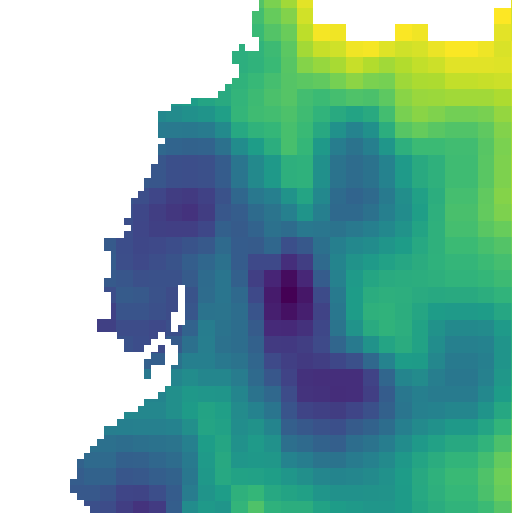

In [104]:
time = datetime.strptime('2019-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")
bbox = [-82.3980406333363, -5.293227102564487, -74.8394468833363, 2.5290385224355134]

width = 512
x_resolution = (bbox[2] - bbox[0]) / width

expression_combined.wms_get_map_as_image(
    ge.QueryRectangle(
        bbox,
        [time, time],
        resolution=(x_resolution, x_resolution)
    ),
    colorizer=ge.Colorizer(map_name="viridis", min_max=(-32766,-30760)),
)

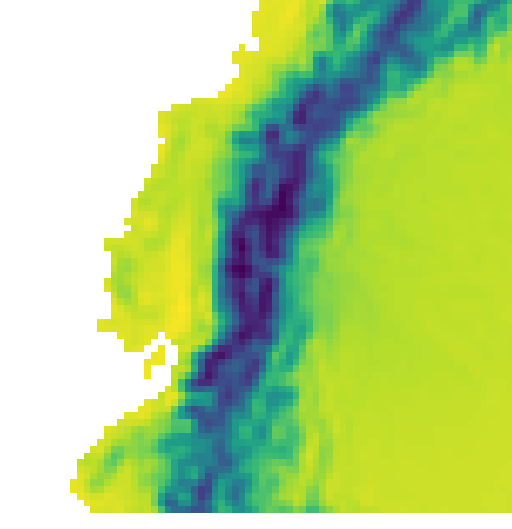

In [105]:
surface_pressure.wms_get_map_as_image(
    ge.QueryRectangle(
        bbox,
        [time, time],
        resolution=(x_resolution, x_resolution)
    ),
    colorizer=ge.Colorizer(map_name="viridis", min_max=(629,1020)),
)